# Simple OLS Debugging Notebook

Test out basic regression loss functions, link functions, and general BoostModel implementation using the implemented SimpleOLS weak learner as the booster. Each run below should result in decreasing loss over model iterations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import scale
from sklearn.base import clone as clone_model

from genestboost import BoostedModel
from genestboost.weak_learners import SimpleOLS
from genestboost.link_functions import *
from genestboost.loss_functions import *

%matplotlib inline

### Create Fake Dataset for Regression

In [2]:
X, y = make_regression(n_samples=10000,
                       n_features=30,
                       n_informative=30,
                       noise=1.0,
                       random_state=0)
X = scale(X)
y = scale(y)

### Simple OLS weak learner implementation as the weak learner

In [3]:
lr_model = SimpleOLS()

### Test 1: Identity Link with Least Squares Loss 

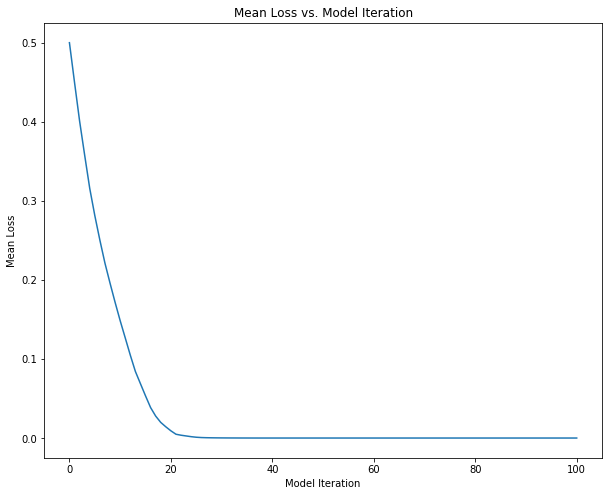

In [4]:
model = BoostedModel(link=IdentityLink(),
                     loss=LeastSquaresLoss(),
                     alpha=1.0)
model.fit(X, y, lr_model, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

### Test 2: Identity Link with Least Squares Loss and Newton Weights

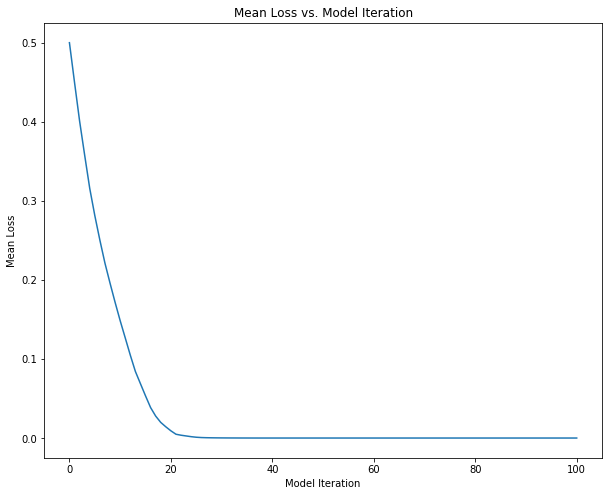

In [5]:
model = BoostedModel(link=IdentityLink(),
                     loss=LeastSquaresLoss(),
                     weights="newton",
                     alpha=1.0)
model.fit(X, y, lr_model, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

### Test 2: Identity Link with Absolute Loss

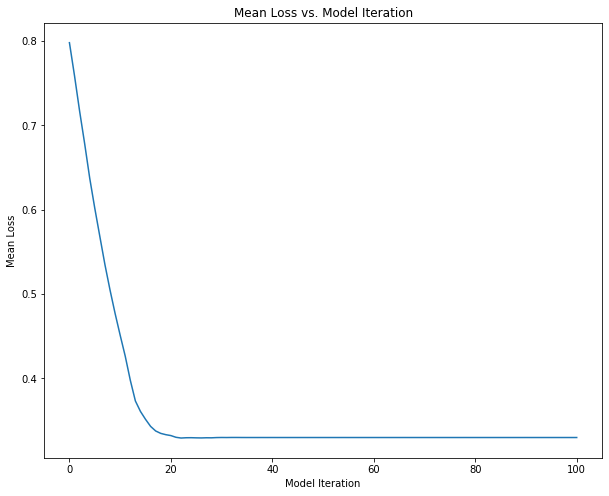

In [6]:
model = BoostedModel(link=IdentityLink(),
                     loss=AbsoluteLoss(),
                     alpha=1.0)
model.fit(X, y, lr_model, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

### Test 3: Identity Link with Log Cosh Loss

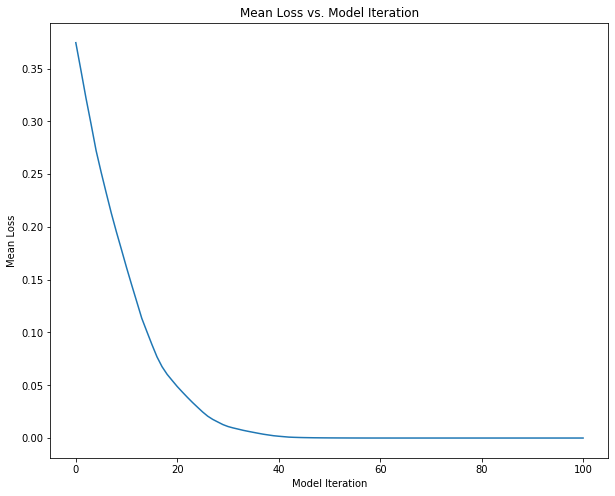

In [7]:
model = BoostedModel(link=IdentityLink(),
                     loss=LogCoshLoss(),
                     alpha=1.0)
model.fit(X, scale(y), lr_model, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

### Test 4: Identity Link with Log Cosh Loss and Newton Weights

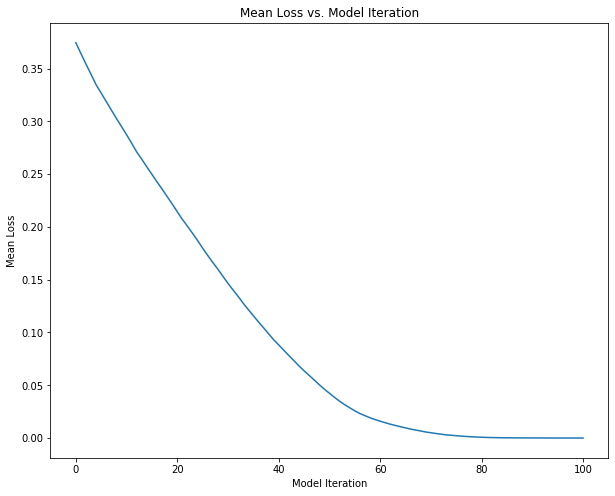

In [8]:
model = BoostedModel(link=IdentityLink(),
                     loss=LogCoshLoss(),
                     alpha=1.0,
                     weights="newton")
model.fit(X, scale(y), lr_model, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

### Test 5: Identity Link with Quantile Loss - p = 0.5 (should approximately match AbsoluteLoss above)

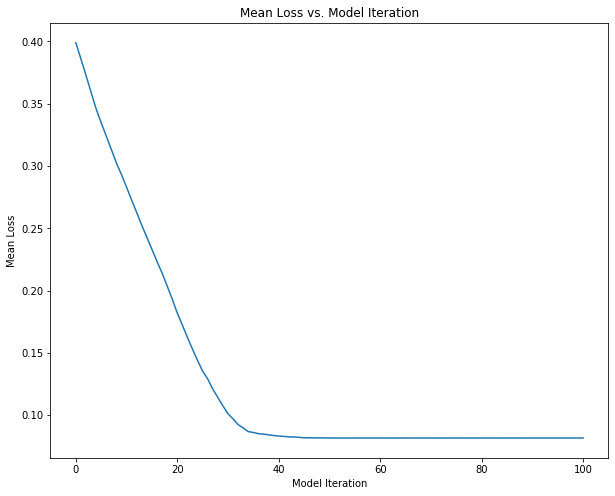

In [9]:
model = BoostedModel(link=IdentityLink(),
                     loss=QuantileLoss(p=0.5),
                     alpha=1.0)
model.fit(X, scale(y), lr_model, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

### Test 6: Identity Link with Quantile Loss - p = 0.95

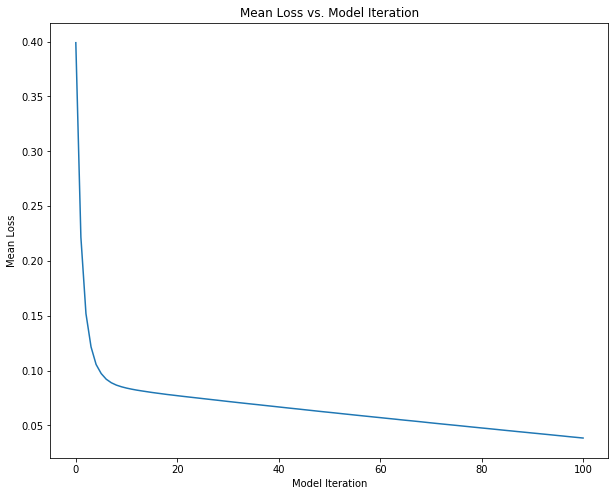

In [10]:
model = BoostedModel(link=IdentityLink(),
                     loss=QuantileLoss(p=0.95),
                     alpha=1.0)
model.fit(X, scale(y), lr_model, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

In [11]:
model.predict(X)[:10]   # should be greater than below predicted

array([ 1.01205335, -0.48975304,  1.41795675,  1.61714683,  0.69320304,
        0.40143972,  0.07309156,  1.03174668,  1.46593601,  0.56983776])

### Test 7: Identity Link with Quantile Loss - p = 0.05

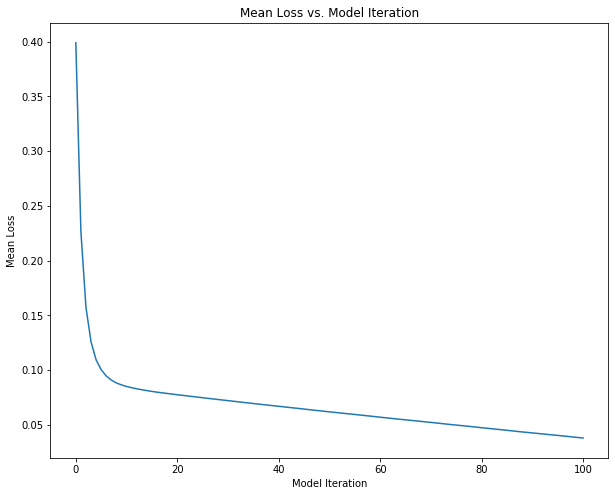

In [12]:
model = BoostedModel(link=IdentityLink(),
                     loss=QuantileLoss(p=0.05),
                     alpha=1.0)
model.fit(X, y, lr_model, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

In [13]:
model.predict(X)[:10]   # should be less than above predicted

array([-0.1661558 , -1.82855155,  0.09985615,  0.3311029 , -0.61262231,
       -0.8077706 , -1.1421454 , -0.25588395,  0.23485979, -0.67153142])